# Evaluation for IR

Here we are only going to look at offline evaluation metrics. We won't cover online evaluation techniques like click-through rate or running A/B tests where a subset of users are presented results from a newer test system.

## Offline evaluation

The idea behind these evaluations is to quantitatively compare multiple IR models. Typically we have a labelled dataset where we have queries mapped to relvevant documents. The documents could either be graded or non-graded(binary). For example, a graded relevance score could be on a scale of 0-5 with 5 being the most relevant.

Labelled data typicalls comes form manual annotations or click data.

It's also not necessary to have just 1 document tagged as relevant for each query. TREC collections have 100s of documents tagged as relevant per quuery. On the other hand MSMARCO has ~1 document tagged as relevant per query. This tends to be quite noisy but easy to scale hence more variability in the queries.

## Binary labels

### Precision@k

Precision@k corresponds to the number of relevant documents among top k retrieved documents.

$$ Precision@k = \frac{TP@k}{TP@k + FP@k} $$

![](assets/precision@k.png)

Precision fails to take into account the ordering of the relevant documents. For example consider the models A and B (Fig 2) where model A outputs `[1,1,1,0,0](first 3 relevant)` and model B outputs `[0,0,1,1,1](indices 3-5 relevant)`; both the models get the same score `Precision@5=3/5`.

### MAP: Mean Average Precision

Users look at results closely, every time they find a new relevant documents, they look at the full picture of what has been before.

MAP squeezes complex evaluation into a single number. Hard to interpret. MAP corresponds to the area under *Precision-Recall curve*.

$$ MAP(Q) = \frac{1}{|Q|} * \sum_{q\in Q} \frac{\sum_{i=1}^k P(q)_{@i} * rel(q)_i}{|rel(q)|} $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |Q| &nbsp; Number of queries<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 𝑃(𝑞)@𝑖 &nbsp; Precision of query q after frist i documents<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 𝑟𝑒𝑙(𝑞)𝑖 &nbsp; Binary relevance of doc at position<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |𝑟𝑒𝑙(𝑞)| &nbsp; Number of relevant documents

### MRR: Mean Reciprocal Rank

Users look at the results from the top; gets annoyed pretty fast; stops once they found the first relevant; doesn't care about the rest.

MRR puts focus on the first relevant document. Applicable with sparse judgments or assuing users are satisfied with one relevant document.

$$ MRR(Q) = \frac{1}{|Q|} * \sum_{q\in Q} \frac{1}{FirstRank(q)} $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |Q| &nbsp; Number of queries<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *FirstRank(q)* &nbsp; Returns the rank of first relevant dcuments for 1 query

MPP places a very strong emphasis on the first position.

In [23]:
import math

import matplotlib.pyplot as plt
%matplotlib inline

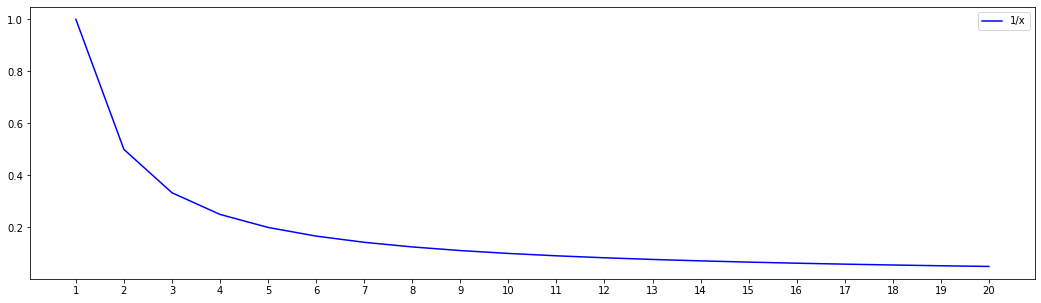

In [36]:
N = 20
plt.figure(figsize=(18, 5));
plt.plot(range(1, N+1), [1/n for n in range(1, N+1)], c="b", label="1/x");
plt.legend();
plt.xticks(range(1, N+1, 1));

## Graded labels

### nDCG: Normalized Discounted Cumulative Gain

Users take for each document the relevance grade and position into account, normalize by best possible ranking per query.

nDCG compares actual results with maximum per query. Relevance is graded. nDCG@10 most commonly used in moderm offline web search evaluation.

$$ DCG(D) = \sum_{d\in D, i=1} \frac{rel(d)}{log_2(i+1)} $$
$$ nDCG(Q) = \frac{1}{|Q|} * \sum_{q\in Q} \frac{DCG(q)}{DCG(sorted(rel(q)))} $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |Q| &nbsp; Number of queries<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D &nbsp; Single document result list<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; rel(d) &nbsp; Relevance grade for query-doc pair<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; rel(q) &nbsp; List of all relevance grades for a query<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sorted() &nbsp; Returns graded documents by descending relevance

Typically we measure at a cutoff @k of the top retrieved documents:
- MAP, Recall: @100, @1000
- Precision, MRR, nDCG: @5, @10, @20

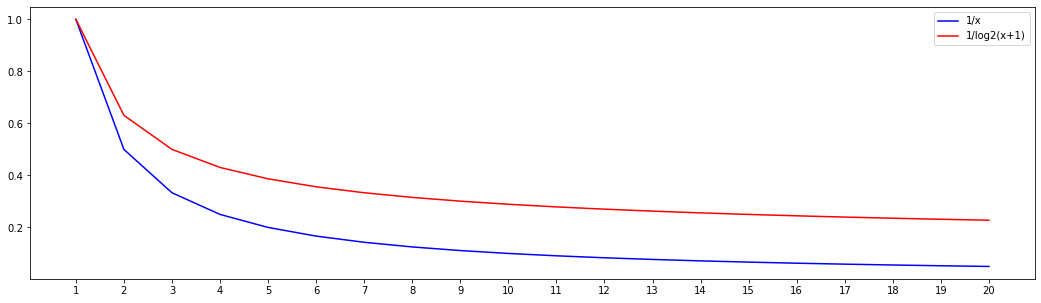

In [37]:
N = 20
plt.figure(figsize=(18, 5));
plt.plot(range(1, N+1), [1/n for n in range(1, N+1)], c="blue", label="1/x");
plt.plot(range(1, N+1), [1/math.log2(n+1) for n in range(1, N+1)], c="red", label="1/log2(x+1)");
plt.legend();
plt.xticks(range(1, N+1, 1));